# <center> Social and Information Networks CSE3021

## <center> Co-occurence of Hash-Tags in Twitter

<left> Karthik Valmeekam (15BCE0175) <br> Rishab Jain (15BCE0308) <br> Siddharth Bhargava (15BCE0628) <br><br> Professor Annapurna J. <br> Slot A1 + TA1

## Introduction:



In [2]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import re

In [3]:
# Twitter App access keys for @user
# Consume:
CONSUMER_KEY    = '4glklFBMR5blxsr63Ywe7OrYR'
CONSUMER_SECRET = 's5c2zuAOmHS84k78yFIyyDMuyCXJx4Jgjv6qwSRT8VR4cAQl6G'

# Access:
ACCESS_TOKEN  = '1305461708-fXs7MLmqOHmHtTU77F1I6I318HuLtsvpFaXbeLq'
ACCESS_SECRET = 'vpJSD6cj4A173L2rj6peto1ph52npMGbNnRPxU5RNnQI0'

In [4]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

    # We create an extractor object:
api = twitter_setup()

In [5]:
#Extracting hashtags and mentions from the tweets
def extract_hash_tags(text):
	return set([re.sub(r"(\W+)$", "", j) for j in set([i for i in text.split() if i.startswith("#")])])
def extract_mentions(text):
	return set([re.sub(r"(\W+)$", "", j) for j in set([i for i in text.split() if i.startswith("@")])])


In [8]:
#Getting the tweets
tweets = tweepy.Cursor(api.search, q='#', include_entities=True, lang="en").items(500)
a=[(tweet.text,tweet.created_at,tweet.retweet_count,tweet.user.screen_name) for tweet in tweets]                 

In [9]:
#Splitting the tuple
twetexts = [x[0] for x in a]
twedate = [x[1] for x in a]
tweret = [x[2] for x in a]
tweuse = [x[3] for x in a]

In [10]:
#Creating a Dataframe
data = pd.DataFrame(data=twetexts, columns=['Tweets'])
#Storing 
data['HashTags'] = np.array([(extract_hash_tags(i)) for i in data['Tweets']])
data['Mentions'] = np.array([(extract_mentions(i)) for i in data['Tweets']])
data['Date'] = np.array(twedate)
data['RTs']    = np.array(tweret)
data['User'] = np.array(tweuse)
data.sort_values(by='Date', ascending=0)

,Tweets,HashTags,Mentions,Date,RTs,User
0,RT @hellcasecom: 🔥AK-47 | Wasteland Rebel #Gi...,"{, #Giveaway}",{@hellcasecom},2017-11-07 15:13:12,836,Tomas99550871
3,I found a nice deal on Amazon. 25% OFF coupon ...,{#giveaway},{},2017-11-07 15:13:11,0,tpguess
1,I found a nice deal on Amazon. 25% OFF coupon ...,{#giveaway},{},2017-11-07 15:13:11,0,BlackOpal64
2,Want To Win..#GIVEAWAY: RT &amp; follow us for...,"{#win, #Prize}",{},2017-11-07 15:13:11,0,pamshepherd
6,For your chance to #WIN this So Fresh UK and T...,"{#Competition, #WIN, #Giveaway}",{},2017-11-07 15:13:10,0,RodCherrypie
4,★ Flip Knife | Tiger Tooth (Factory New) #GIVE...,"{#CSGOSkins, #CSGO, #GIVEAWAY, #CSGOGiveaway}","{@CSGOBETCLICK, @GamdomOfficial}",2017-11-07 15:13:10,0,AungSett
5,"I entered a giveaway for a chance to win ""iDGL...",{#giveaway},{},2017-11-07 15:13:10,0,kerner1960
8,RT @csgo_bubble: 🎁 Moche LPGO #Giveaway #CSGO...,"{#CSGO, #Giveaway}","{@csgo_bubble, @mochelpgo}",2017-11-07 15:13:09,584,PpPronniax
7,"I entered a giveaway for a chance to win ""Next...",{#giveaway},{},2017-11-07 15:13:09,0,kakes_phat
9,RT @SportsDen451: OUR GREATEST #GIVEAWAY EVER!...,"{#Pats, #Patriots, #GIVEAWAY}","{, @SportsDen451, @randompicker}",2017-11-07 15:13:08,8,BaileyTaylor609


In [11]:
htlist = list(list(data['HashTags'][a]) for a in range(0,len(data)))
htlist

[[u'', u'#Giveaway'],
 [u'#giveaway'],
 [u'#win', u'#Prize'],
 [u'#giveaway'],
 [u'#CSGOSkins', u'#CSGO', u'#GIVEAWAY', u'#CSGOGiveaway'],
 [u'#giveaway'],
 [u'#Competition', u'#WIN', u'#Giveaway'],
 [u'#giveaway'],
 [u'#CSGO', u'#Giveaway'],
 [u'#Pats', u'#Patriots', u'#GIVEAWAY'],
 [u'#Win', u'#prize', u'#giveaway'],
 [u'#competition', u'#win', u'#games', u'#giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#398', u'#giveaway'],
 [u'#giveaway'],
 [u'#unicorn', u'#Compe', u'#giveaway'],
 [u'#giveaway'],
 [u'', u'#Giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#win', u'#Prize'],
 [u'#WIN', u'#LeapAhead', u'#Giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#unicorn', u'#Compe', u'#giveaway'],
 [u'#giveaway'],
 [u'', u'#Giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#giveaway'],
 [u'#PewDiePie',
  u'#GTX1080',
  u'#eSports',
  u'#Gamer',
  u'#Gaming',
  u'#Giveaway'],
 [u'#giveaway'],
 [u'', u'#Giveaway'],
 [u'#PewDiePie',
  u'#GT

In [12]:
#Finding the co-occurences of all the hashtags
from collections import defaultdict
com = defaultdict(lambda : defaultdict(int))
for k in range(0,len(htlist)):    
    for i in range(len(htlist[k])-1):            
        for j in range(i+1, len(htlist[k])):
            w1, w2 = sorted([htlist[k][i], htlist[k][j]])                
            if w1 != w2:
                com[w1][w2] += 1

In [14]:
com['#giveaway']

defaultdict(int,
            {u'#glu': 2,
             u'#golf': 1,
             u'#holiday': 1,
             u'#horseracing': 2,
             u'#hotcakes': 1,
             u'#hurry': 1,
             u'#icecream': 2,
             u'#indiedev': 1,
             u'#inkyadventure': 1,
             u'#italianfood': 1,
             u'#leash': 1,
             u'#ontheblog': 2,
             u'#orlygift': 1,
             u'#p4wnyhof': 1,
             u'#pga': 1,
             u'#prize': 7,
             u'#prizes': 1,
             u'#racing': 2,
             u'#res': 1,
             u'#ret': 1,
             u'#retweet': 4,
             u'#steam': 1,
             u'#swag': 2,
             u'#sweep': 1,
             u'#sweeps': 1,
             u'#sweepstakes': 1,
             u'#target': 1,
             u'#tbl': 1,
             u'#tips': 2,
             u'#tipster': 1,
             u'#to': 1,
             u'#toy': 2,
             u'#unicorn': 2,
             u'#wi': 1,
             u'#win': 30,
   

In [15]:
import operator
com_max = []
# For our term, look for the most common co-occurrent terms
for t1 in com:
    if(t1 == '#giveaway'):
        t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:10]
        for t2, t2_count in t1_max_terms:
            com_max.append(((t1, t2), t2_count))

In [16]:
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
terms_max

[((u'#giveaway', u'#win'), 30),
 ((u'#giveaway', u'#prize'), 7),
 ((u'#giveaway', u'#retweet'), 4),
 ((u'#giveaway', u'#ontheblog'), 2),
 ((u'#giveaway', u'#glu'), 2),
 ((u'#giveaway', u'#racing'), 2),
 ((u'#giveaway', u'#tips'), 2),
 ((u'#giveaway', u'#swag'), 2),
 ((u'#giveaway', u'#toy'), 2),
 ((u'#giveaway', u'#unicorn'), 2)]

### Visualization of the co-occuring Hashtags:

In [17]:
# For plotting and visualization
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
G = nx.DiGraph()
G.add_nodes_from(htlist)


ValueError: dictionary update sequence element #0 has length 1; 2 is required

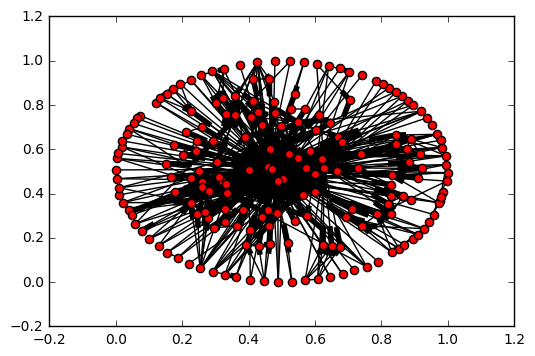

In [30]:
nx.draw_networkx(G, node_size=35, with_labels=False)